# Libraries

### General Libraries

In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import re

### Audio Analyzing

In [353]:
import librosa
import librosa.display

## CNN Libraries

In [354]:
# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# Data

### Path for Data

In [355]:
RAVDESS = 'RAVDESS'
TESS = "TESS Toronto emotional speech set data"
SAVEE = "ALL/"
CREMA = 'AudioWAV/'

### Ravdess Dataset

In [356]:
import os

file_emotion = []
file_path = []

ravdess_directory_list = os.listdir(RAVDESS)

for i in ravdess_directory_list:
    # Construct the full path to the actor directory
    actor_dir = os.path.join(RAVDESS, i)
    
    # List files in the actor directory
    actor = os.listdir(actor_dir)
    
    for f in actor:
        part = f.split('.')[0].split('-')
        
        # Third part in each file represents the emotion associated with that file
        file_emotion.append(int(part[2]))
        
        # Construct the full path to the file
        file_path.append(os.path.join(actor_dir, f).replace('\\', '/'))  # Replace backslashes with forward slashes

# Create DataFrame for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Create DataFrame for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate DataFrames to create the final DataFrame
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Change integers to actual emotions
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',8:'surprise'},
                            inplace=True)

print(ravdess_df.Emotions.value_counts())


Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_10232\1016716695.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',8:'surprise'},


### TESS Dataset

In [357]:
import os

tess_directory_list = os.listdir(TESS)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    # Construct the full path to the current directory
    full_dir_path = os.path.join(TESS, dir)
    directories = os.listdir(full_dir_path)
    for file in directories:
        # Construct the full path to the current file
        full_file_path = os.path.join(full_dir_path, file)
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(full_file_path.replace('\\', '/'))  # Replace backslashes with forward slashes

# Create DataFrames for emotion and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the DataFrames to create the final DataFrame
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64


### Crema Dataset

In [358]:
crema_directory_list = os.listdir(CREMA)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(CREMA+ file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


### Save Dataset

In [367]:
savee_directory_list = os.listdir(SAVEE)

file_emotion = []
file_path = []

for file in os.listdir(SAVEE):
    # Use the filename directly without prepending SAVEE
    file_path.append('ALL/' + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
          file_emotion.append('angry')
    elif ele=='d':
          file_emotion.append('disgust')
    elif ele=='f':
          file_emotion.append('fear')
    elif ele=='h':
          file_emotion.append('happy')
    elif ele=='n':
          file_emotion.append('neutral')
    elif ele=='sa':
          file_emotion.append('sad')
    else:
          file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


### Combine / Integrate Datasets

In [360]:
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,RAVDESS/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,RAVDESS/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,RAVDESS/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,RAVDESS/Actor_01/03-01-01-01-02-02-01.wav
4,neutral,RAVDESS/Actor_01/03-01-02-01-01-01-01.wav


In [361]:
data_path['Emotions'].value_counts()

Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

## Data Distribution

C:\Users\user\AppData\Local\Temp\ipykernel_10232\4241608000.py:11: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.countplot(data=data_path, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])


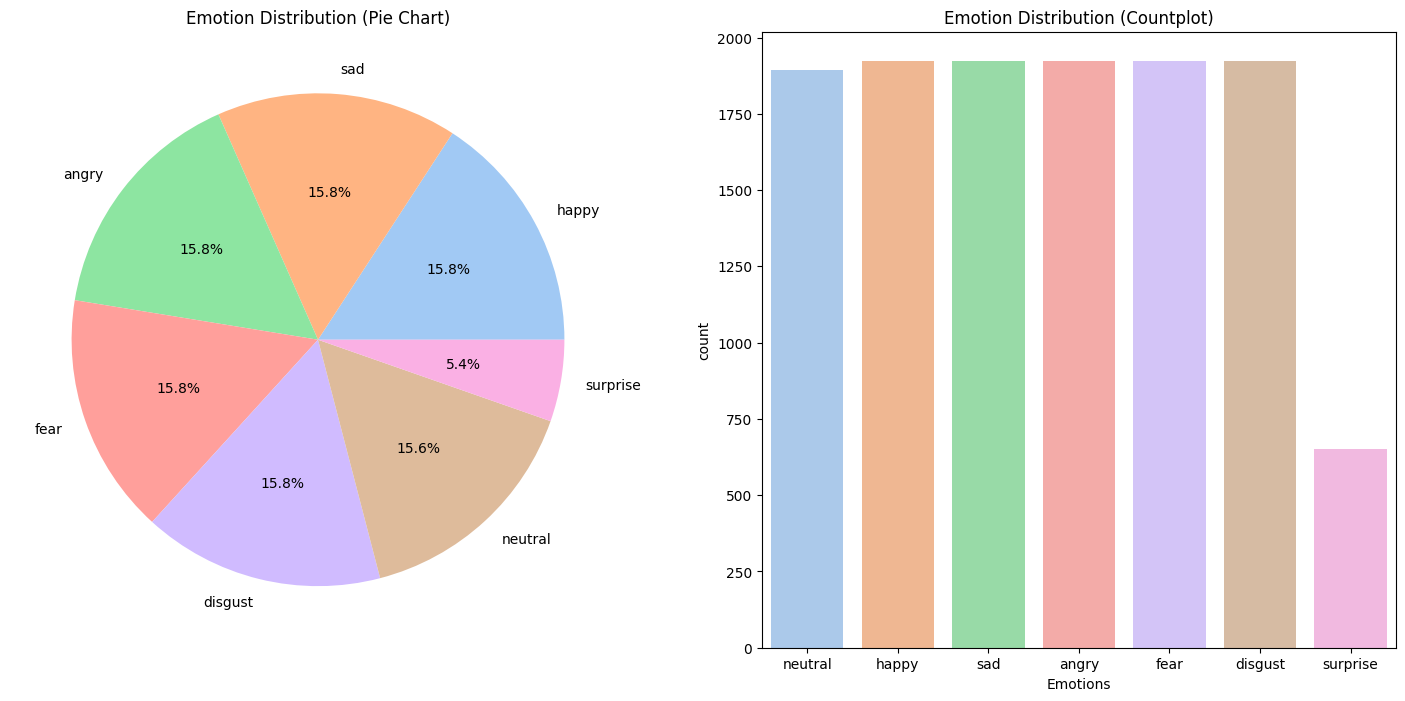

In [362]:
colors = sns.color_palette('pastel')
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
data_path['Emotions'].value_counts().plot(kind='pie', ax=ax[0], autopct='%1.1f%%', colors=colors)
ax[0].set_ylabel('')
ax[0].set_title('Emotion Distribution (Pie Chart)')

# Countplot
sns.countplot(data=data_path, x='Emotions', hue='Emotions', palette=colors, ax=ax[1])
ax[1].set_title('Emotion Distribution (Countplot)')

plt.show()

Dari Keempat dataset yang diambil, ketika dikombinasikan terjadi ketidak stabilan, dimana dataset untuk sepech yang terkategori 'surprise' berada di bawah rata - rata dataset lainnya yang mencapai lebih dari 1500 audio file.

##  LOG Mel Spectogram

In [368]:
data,sr = librosa.load(file_path[0])
sr

22050

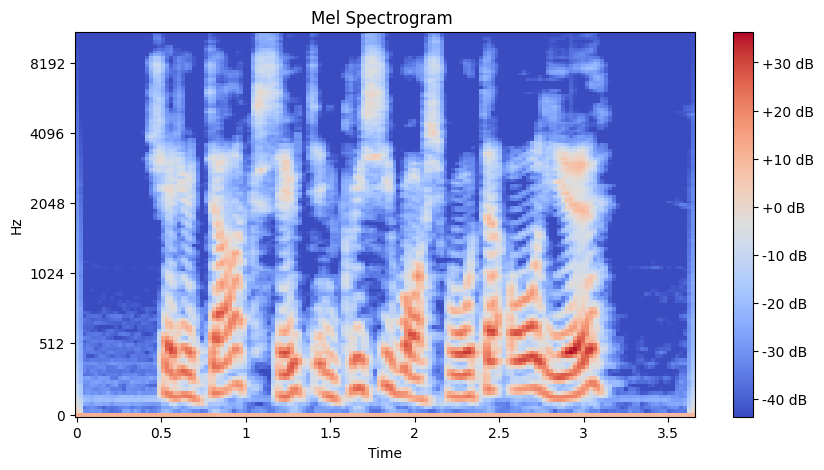

In [369]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

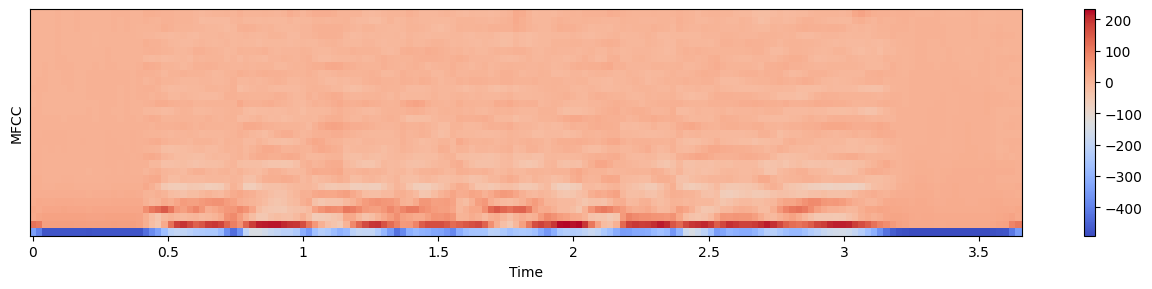

In [370]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

## Waveform of 7 emotions

### Neutral

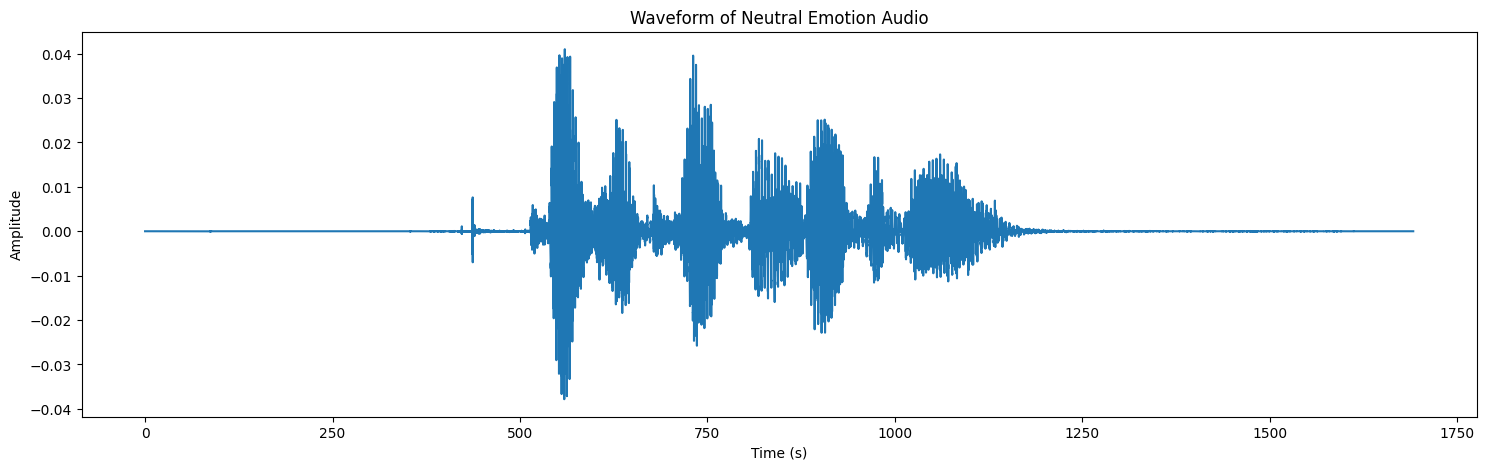

In [412]:
neutral = data_path[data_path['Emotions'] == 'neutral']['Path']
neutral = neutral.iloc[0]
y, sr = librosa.load(neutral)
time = librosa.times_like(y, sr=sr)
plt.figure(figsize=(18, 5))
plt.plot(time, y)
plt.title('Waveform of Neutral Emotion Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [413]:
Audio(y, rate = sr)

### Happy

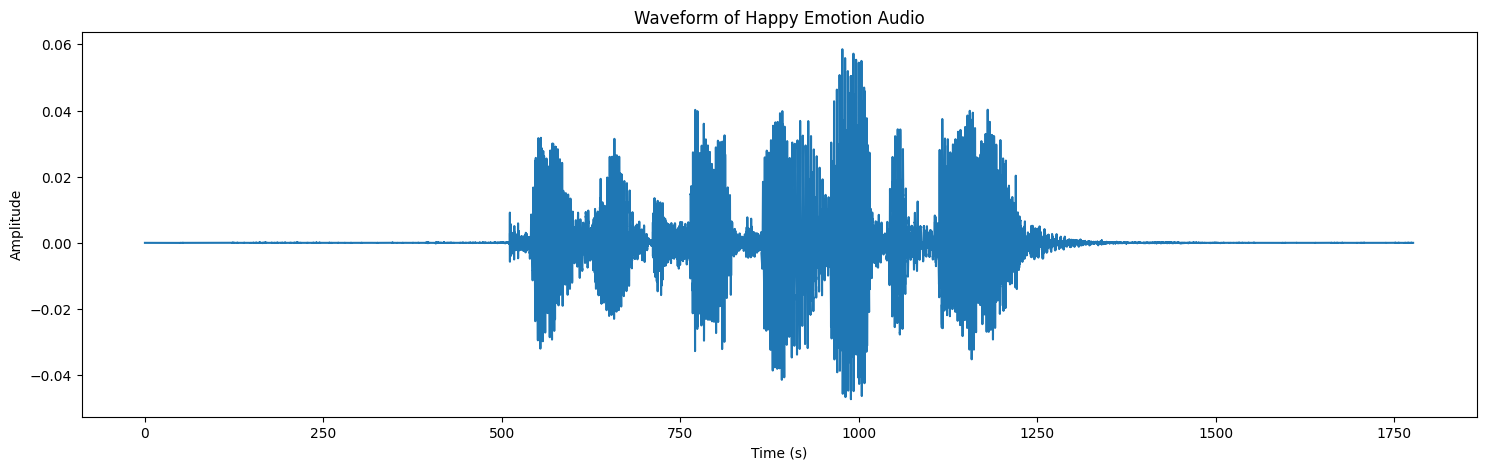

In [414]:
neutral = data_path[data_path['Emotions'] == 'happy']['Path']
neutral = neutral.iloc[0]
y, sr = librosa.load(neutral)
time = librosa.times_like(y, sr=sr)
plt.figure(figsize=(18, 5))
plt.plot(time, y)
plt.title('Waveform of Happy Emotion Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [415]:
Audio(y, rate = sr)

### Sad

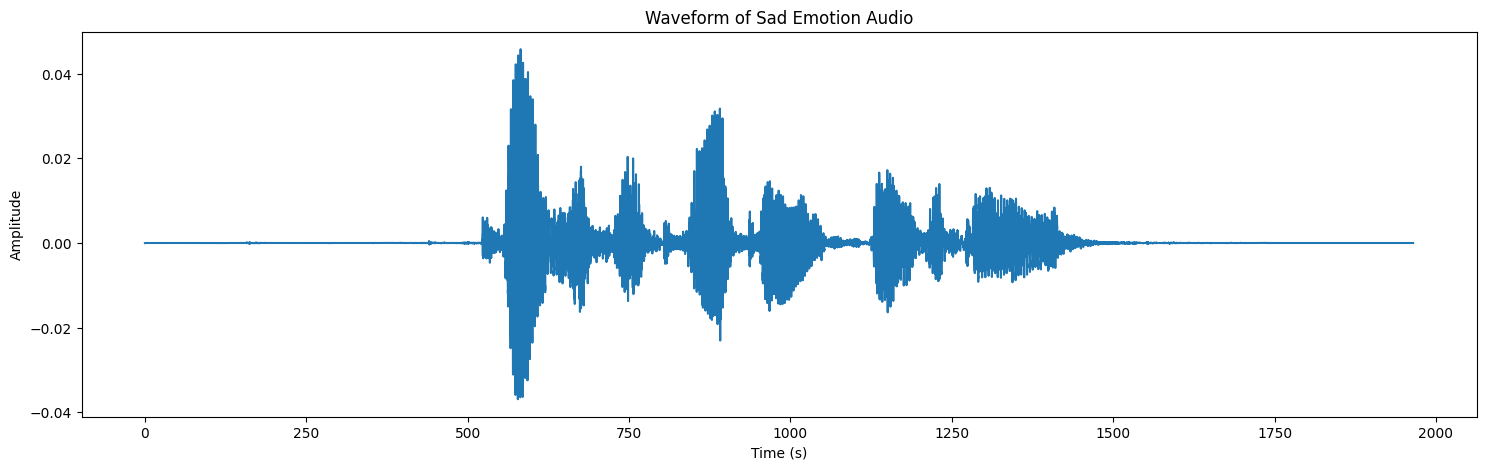

In [416]:
neutral = data_path[data_path['Emotions'] == 'sad']['Path']
neutral = neutral.iloc[0]
y, sr = librosa.load(neutral)
time = librosa.times_like(y, sr=sr)
plt.figure(figsize=(18, 5))
plt.plot(time, y)
plt.title('Waveform of Sad Emotion Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [417]:
Audio(y, rate = sr)

### Angry

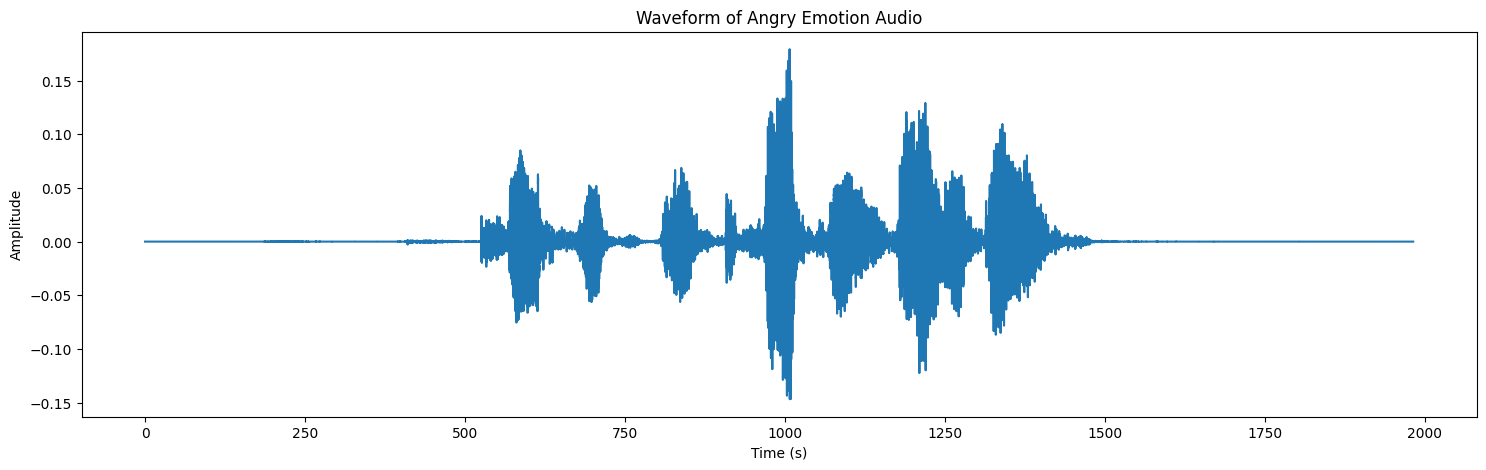

In [418]:
angry = data_path[data_path['Emotions'] == 'angry']['Path']
angry = angry.iloc[0]
y, sr = librosa.load(angry)
time = librosa.times_like(y, sr=sr)
plt.figure(figsize=(18, 5))
plt.plot(time, y)
plt.title('Waveform of Angry Emotion Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [419]:
Audio(y, rate = sr)

### Fear

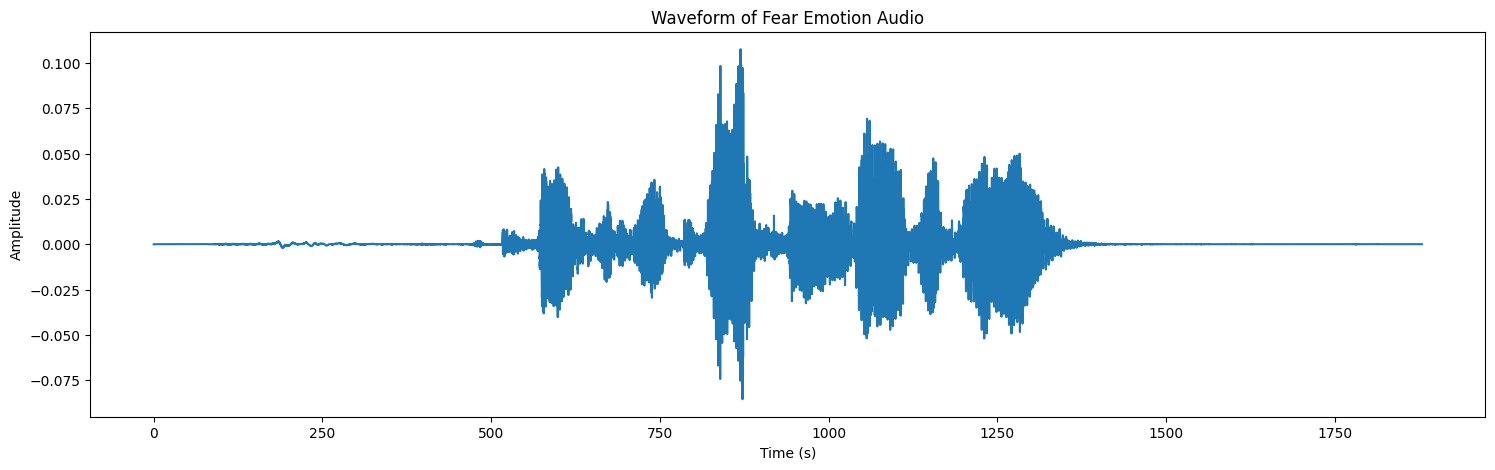

In [420]:
fear = data_path[data_path['Emotions'] == 'fear']['Path']
fear = fear.iloc[0]
y, sr = librosa.load(fear)
time = librosa.times_like(y, sr=sr)
plt.figure(figsize=(18, 5))
plt.plot(time, y)
plt.title('Waveform of Fear Emotion Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [421]:
Audio(y, rate = sr)

### Disgust

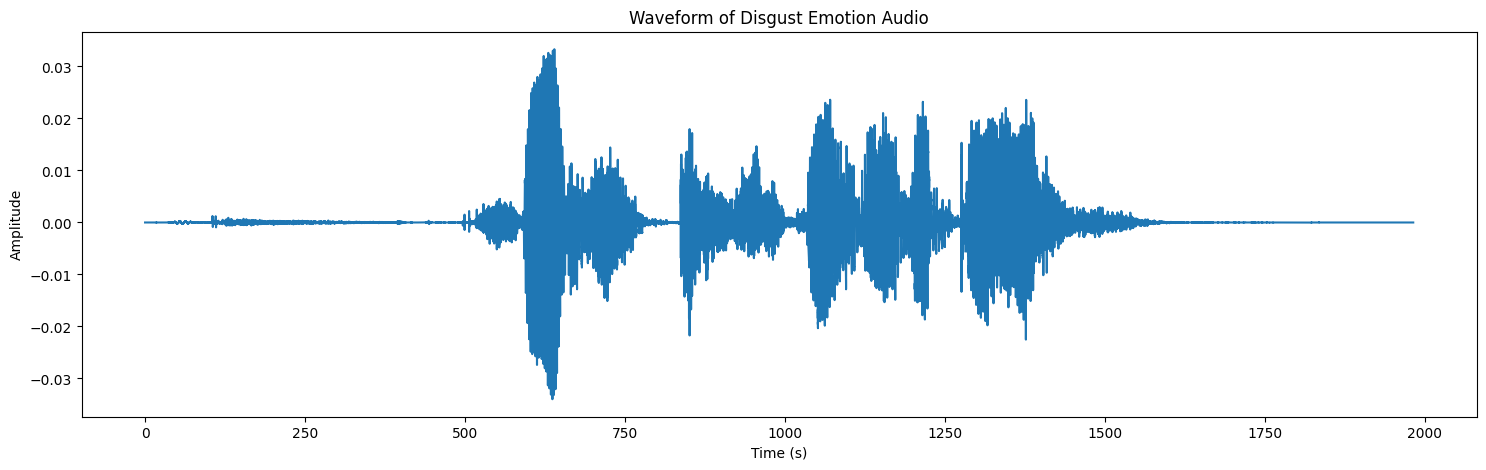

In [422]:
disgust = data_path[data_path['Emotions'] == 'disgust']['Path']
disgust = disgust.iloc[0]
y, sr = librosa.load(disgust)
time = librosa.times_like(y, sr=sr)
plt.figure(figsize=(18, 5))
plt.plot(time, y)
plt.title('Waveform of Disgust Emotion Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [423]:
Audio(y, rate = sr)

### Surprise

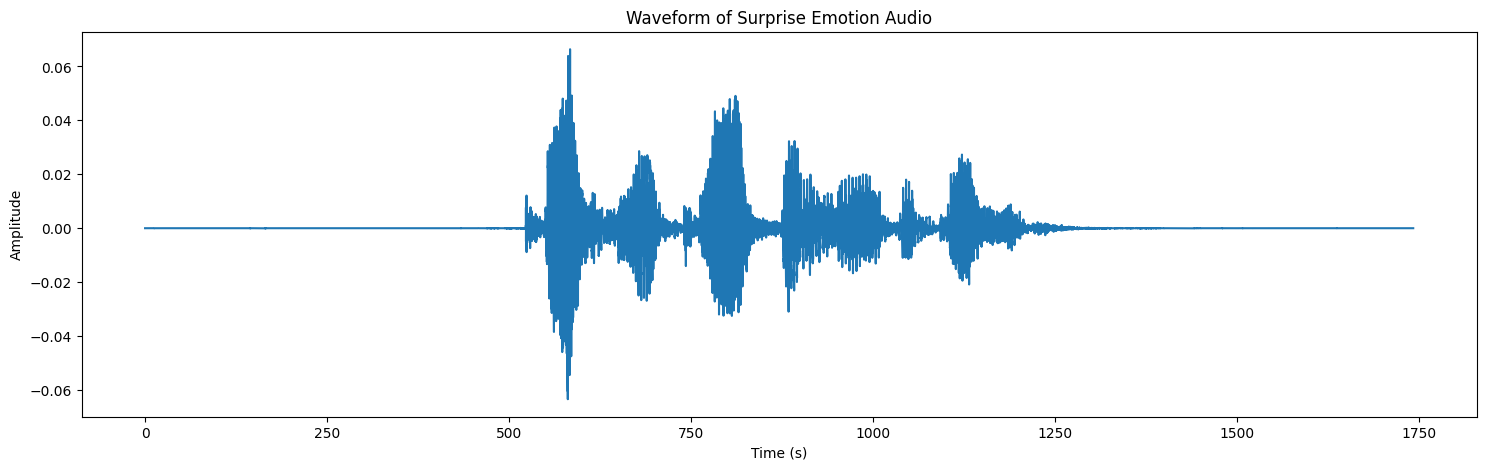

In [424]:
surprise = data_path[data_path['Emotions'] == 'surprise']['Path']
surprise = surprise.iloc[0]
y, sr = librosa.load(surprise)
time = librosa.times_like(y, sr=sr)
plt.figure(figsize=(18, 5))
plt.plot(time, y)
plt.title('Waveform of Surprise Emotion Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [425]:
Audio(y, rate = sr)

# Data Preprocessing

## Data Augmentation

### Noise

In [479]:
def noise(data):
    max_amplitude = np.max(np.abs(data))
    amplifier = 0.035 * np.random.uniform() * max_amplitude
    data = data + amplifier*np.random.normal(size = data.shape[0])
    return data

### Stretch

In [552]:
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate = rate)

### Shift

In [543]:
def shift(data):
    shift_range = int(np.random.uniform(low = -5, high=5)*1000)
    return np.roll(data, shift_range)

### Pitch

In [631]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

### Speed Adjustment

In [632]:
def increase_speed(data, speed_factor = 1.25):
    return librosa.effect.time_stretch(data, speed_factor)

def decrease_speed(data, speed_factor = 0.75):
    return librosa.effect.time_stretch(data, speed_factor)

### Random Audio Test

In [644]:
sampel = data_path.sample(n=1)
sampel = sampel['Path'].values[0]
sampel, sr = librosa.load(sampel)
Audio(sampel, rate=sr)

## Data Augmentation Process / Effect

### Normal Audio

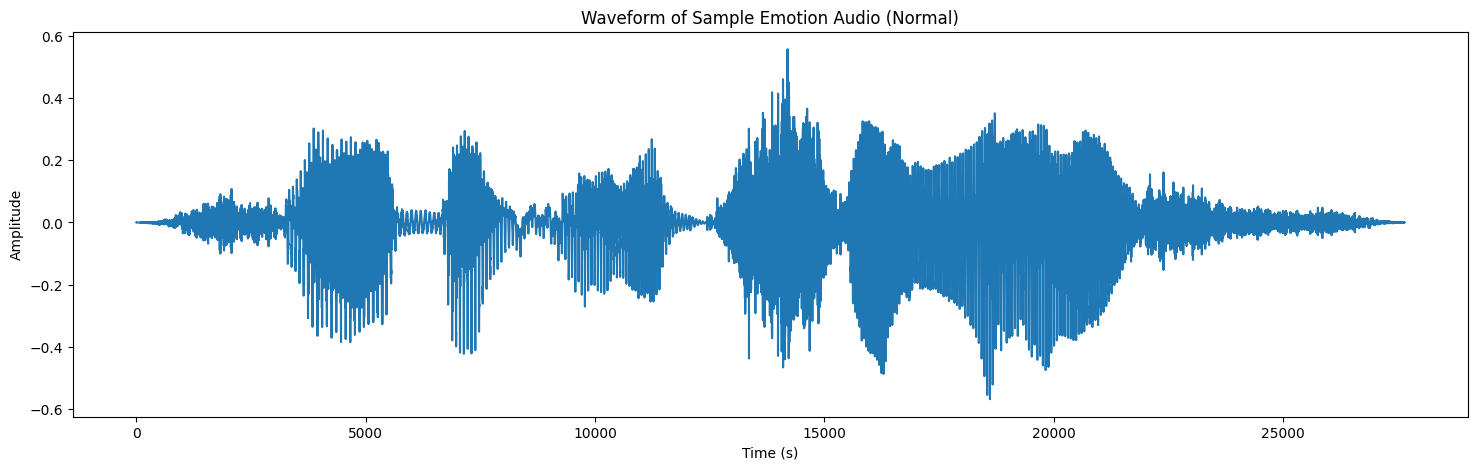

In [645]:
plt.figure(figsize=(18, 5))
plt.plot(sampel)
plt.title('Waveform of Sample Emotion Audio (Normal)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [646]:
Audio(sampel, rate=sr)

### Audio with Noise

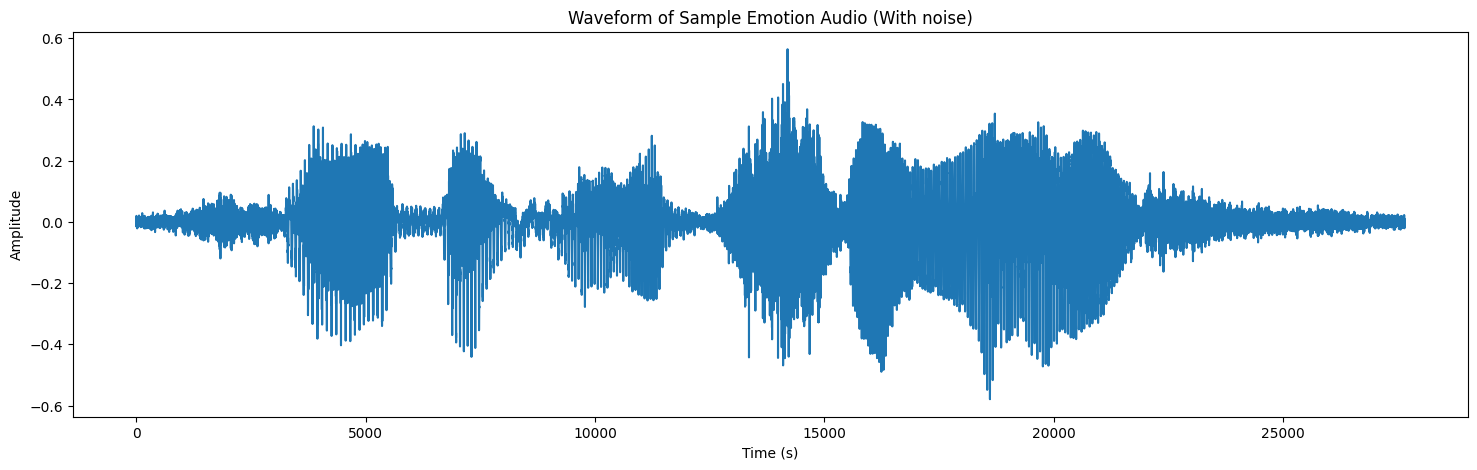

In [647]:
AudioNoise = noise(sampel)
plt.figure(figsize=(18, 5))
plt.plot(AudioNoise)
plt.title('Waveform of Sample Emotion Audio (With noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [648]:
Audio(AudioNoise, rate=sr)

### Stretched Audio

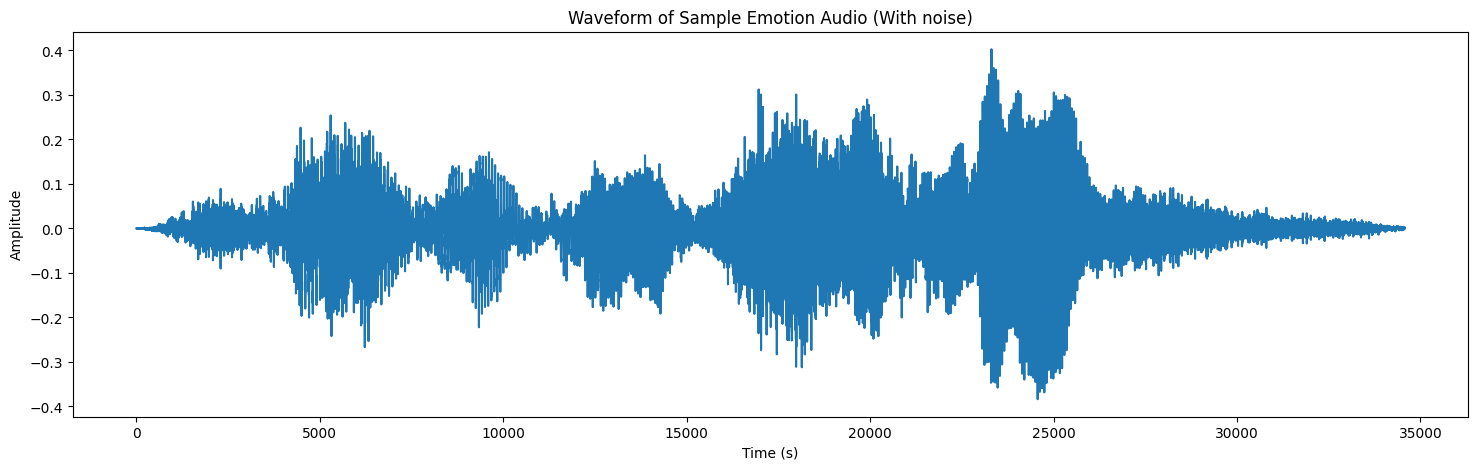

In [649]:
StretchedNoise = stretch(sampel)
plt.figure(figsize=(18, 5))
plt.plot(StretchedNoise)
plt.title('Waveform of Sample Emotion Audio (With noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [650]:
Audio(StretchedNoise, rate=sr)

### Shifted Audio

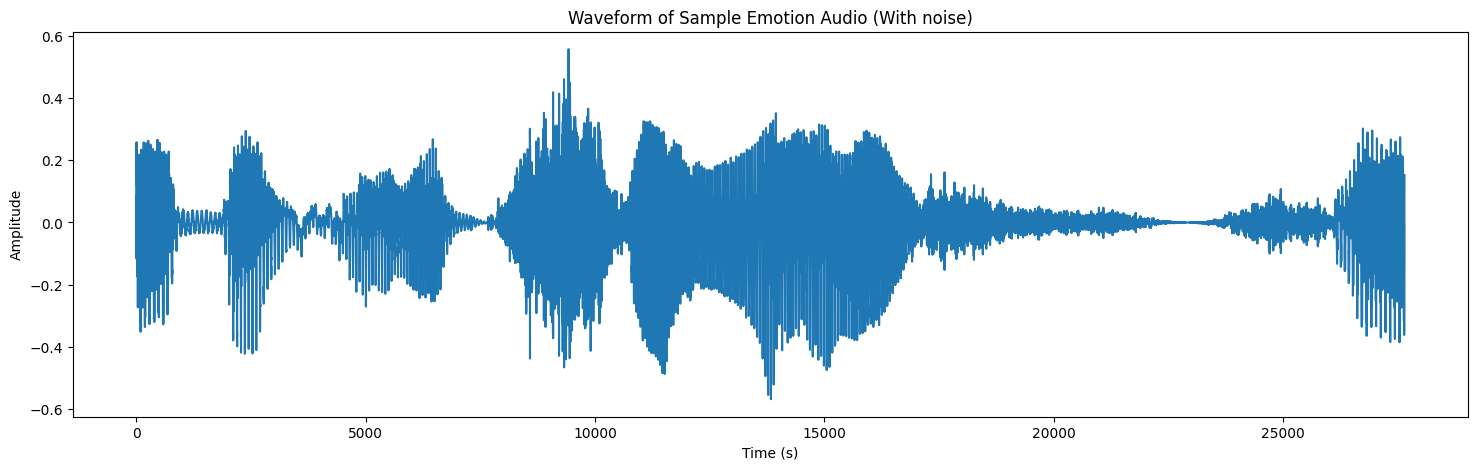

In [651]:
ShiftedNoise = shift(sampel)
plt.figure(figsize=(18, 5))
plt.plot(ShiftedNoise)
plt.title('Waveform of Sample Emotion Audio (With noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [652]:
Audio(ShiftedNoise, rate=sr)

### Pitched Audio

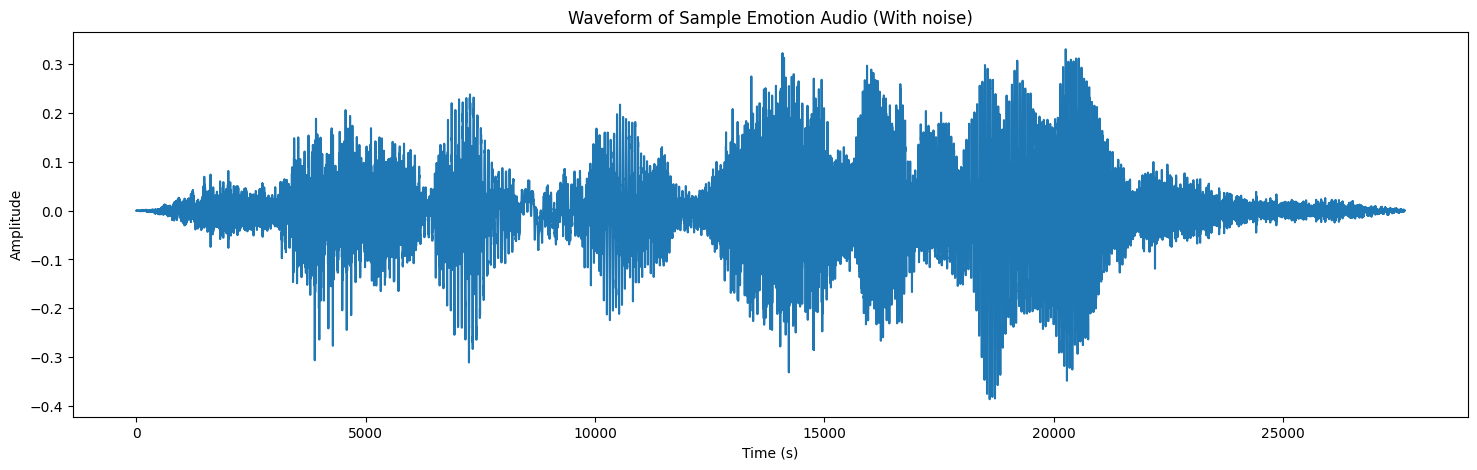

In [654]:
PitchedNoise = pitch(sampel, sr)  # Assuming `sample` and `sr` are defined elsewhere
plt.figure(figsize=(18, 5))
plt.plot(PitchedNoise)
plt.title('Waveform of Sample Emotion Audio (With noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [656]:
Audio(PitchedNoise, rate=sr)

# Feature Extraction

### MFCC

In [658]:
def mfcc(data, sr, frame_length = 2048, hop_length = 512, flatten:bool=True):
    mfcc =  librosa.feature.mfcc(data, sr = sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

### ZCR (Zero Crossing Rate)

In [660]:
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length = frame_length, hop_length = hop_length)

### RMSE